# <div style="text-align:center; border-radius:30px 30px; padding:13px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#1c4f9e; overflow:hidden"><b>Houses prices predictions 🏠</b></div>

# 1. Introduction 

## 1.1 Project Overview

This project aims to develop a regression model to predict house prices in King County, which includes Seattle. The dataset used for this analysis comes from Kaggle and contains real estate sales data between May 2014 and May 2015. I am undertaking this project as part of my training program to enhance my data science and machine learning skills.

## 1.2 Objective

Build an accurate regression model to estimate house prices based on key characteristics.


## 1.3 Dataset 

- Source: King County House Sales
- Period: May 2014 - May 2015
- Key Variables:

- Price
- Number of bedrooms
- Number of bathrooms
- Living square footage
- Lot square footage
- Number of floors
- Waterfront presence
- View

## 1.4 Library import 

In [42]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, shapiro

# 3. Data Loading 

## 3.1 Dataset Import 

In [8]:
#Import data
df = pd.read_csv('Dataset/kc_house_data.csv')

## 3.2 Data overview

In [9]:
#Display the head of the dataframs
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.shape

(21613, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 4. Exploratory Data Analysis (EDA) 

## 4.1 Analysis of Missing Values

In [13]:
#Display missing value
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 4.2 Visualizations 

In [47]:
def shapiro_test_for_large_data(data, sample_size=5000):
    """Normality test for large datasets"""
    sample = data.sample(min(len(data), sample_size))
    return stats.shapiro(sample)

In [48]:
def analyze_feature_distribution(df, features=None, cols=4):
    """
    Complete analysis of feature distributions.
    
    Arguments:
    - df: DataFrame containing the data.
    - features: List of columns to analyze (by default, numerical columns).
    - cols: Number of columns per row for visualizations.
    
    Returns:
    - A DataFrame containing the skewness and p-values from the normality tests.
    """
    if features is None:
        # Automatically select numerical columns if 'features' is not provided
        features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    skewness = {}
    normality_tests = {}
    
    for feature in features:
        try:
            # Calculate skewness
            skewness[feature] = skew(df[feature].dropna())
            
            # Normality test (Shapiro-Wilk adjusted for large data)
            _, p_value = shapiro_test_for_large_data(df[feature])
            normality_tests[feature] = p_value
            
        except Exception as e:
            print(f"⚠️ Unable to analyze the column '{feature}': {e}")
            skewness[feature] = np.nan
            normality_tests[feature] = np.nan
    
    # Visualizations
    total_features = len(features)
    rows = -(-total_features // cols)  # Ceiling division to calculate the rows
    
    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, feature in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[feature].dropna(), kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f'{feature}: Distribution')
    plt.tight_layout()
    plt.show()
    
    # Structured report in DataFrame format
    report_df = pd.DataFrame({
        'Feature': features,
        'Skewness': [skewness.get(f, np.nan) for f in features],
        'Normality p-value': [normality_tests.get(f, np.nan) for f in features]
    }).set_index('Feature')
    
    return report_df

In [49]:
features = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'id']

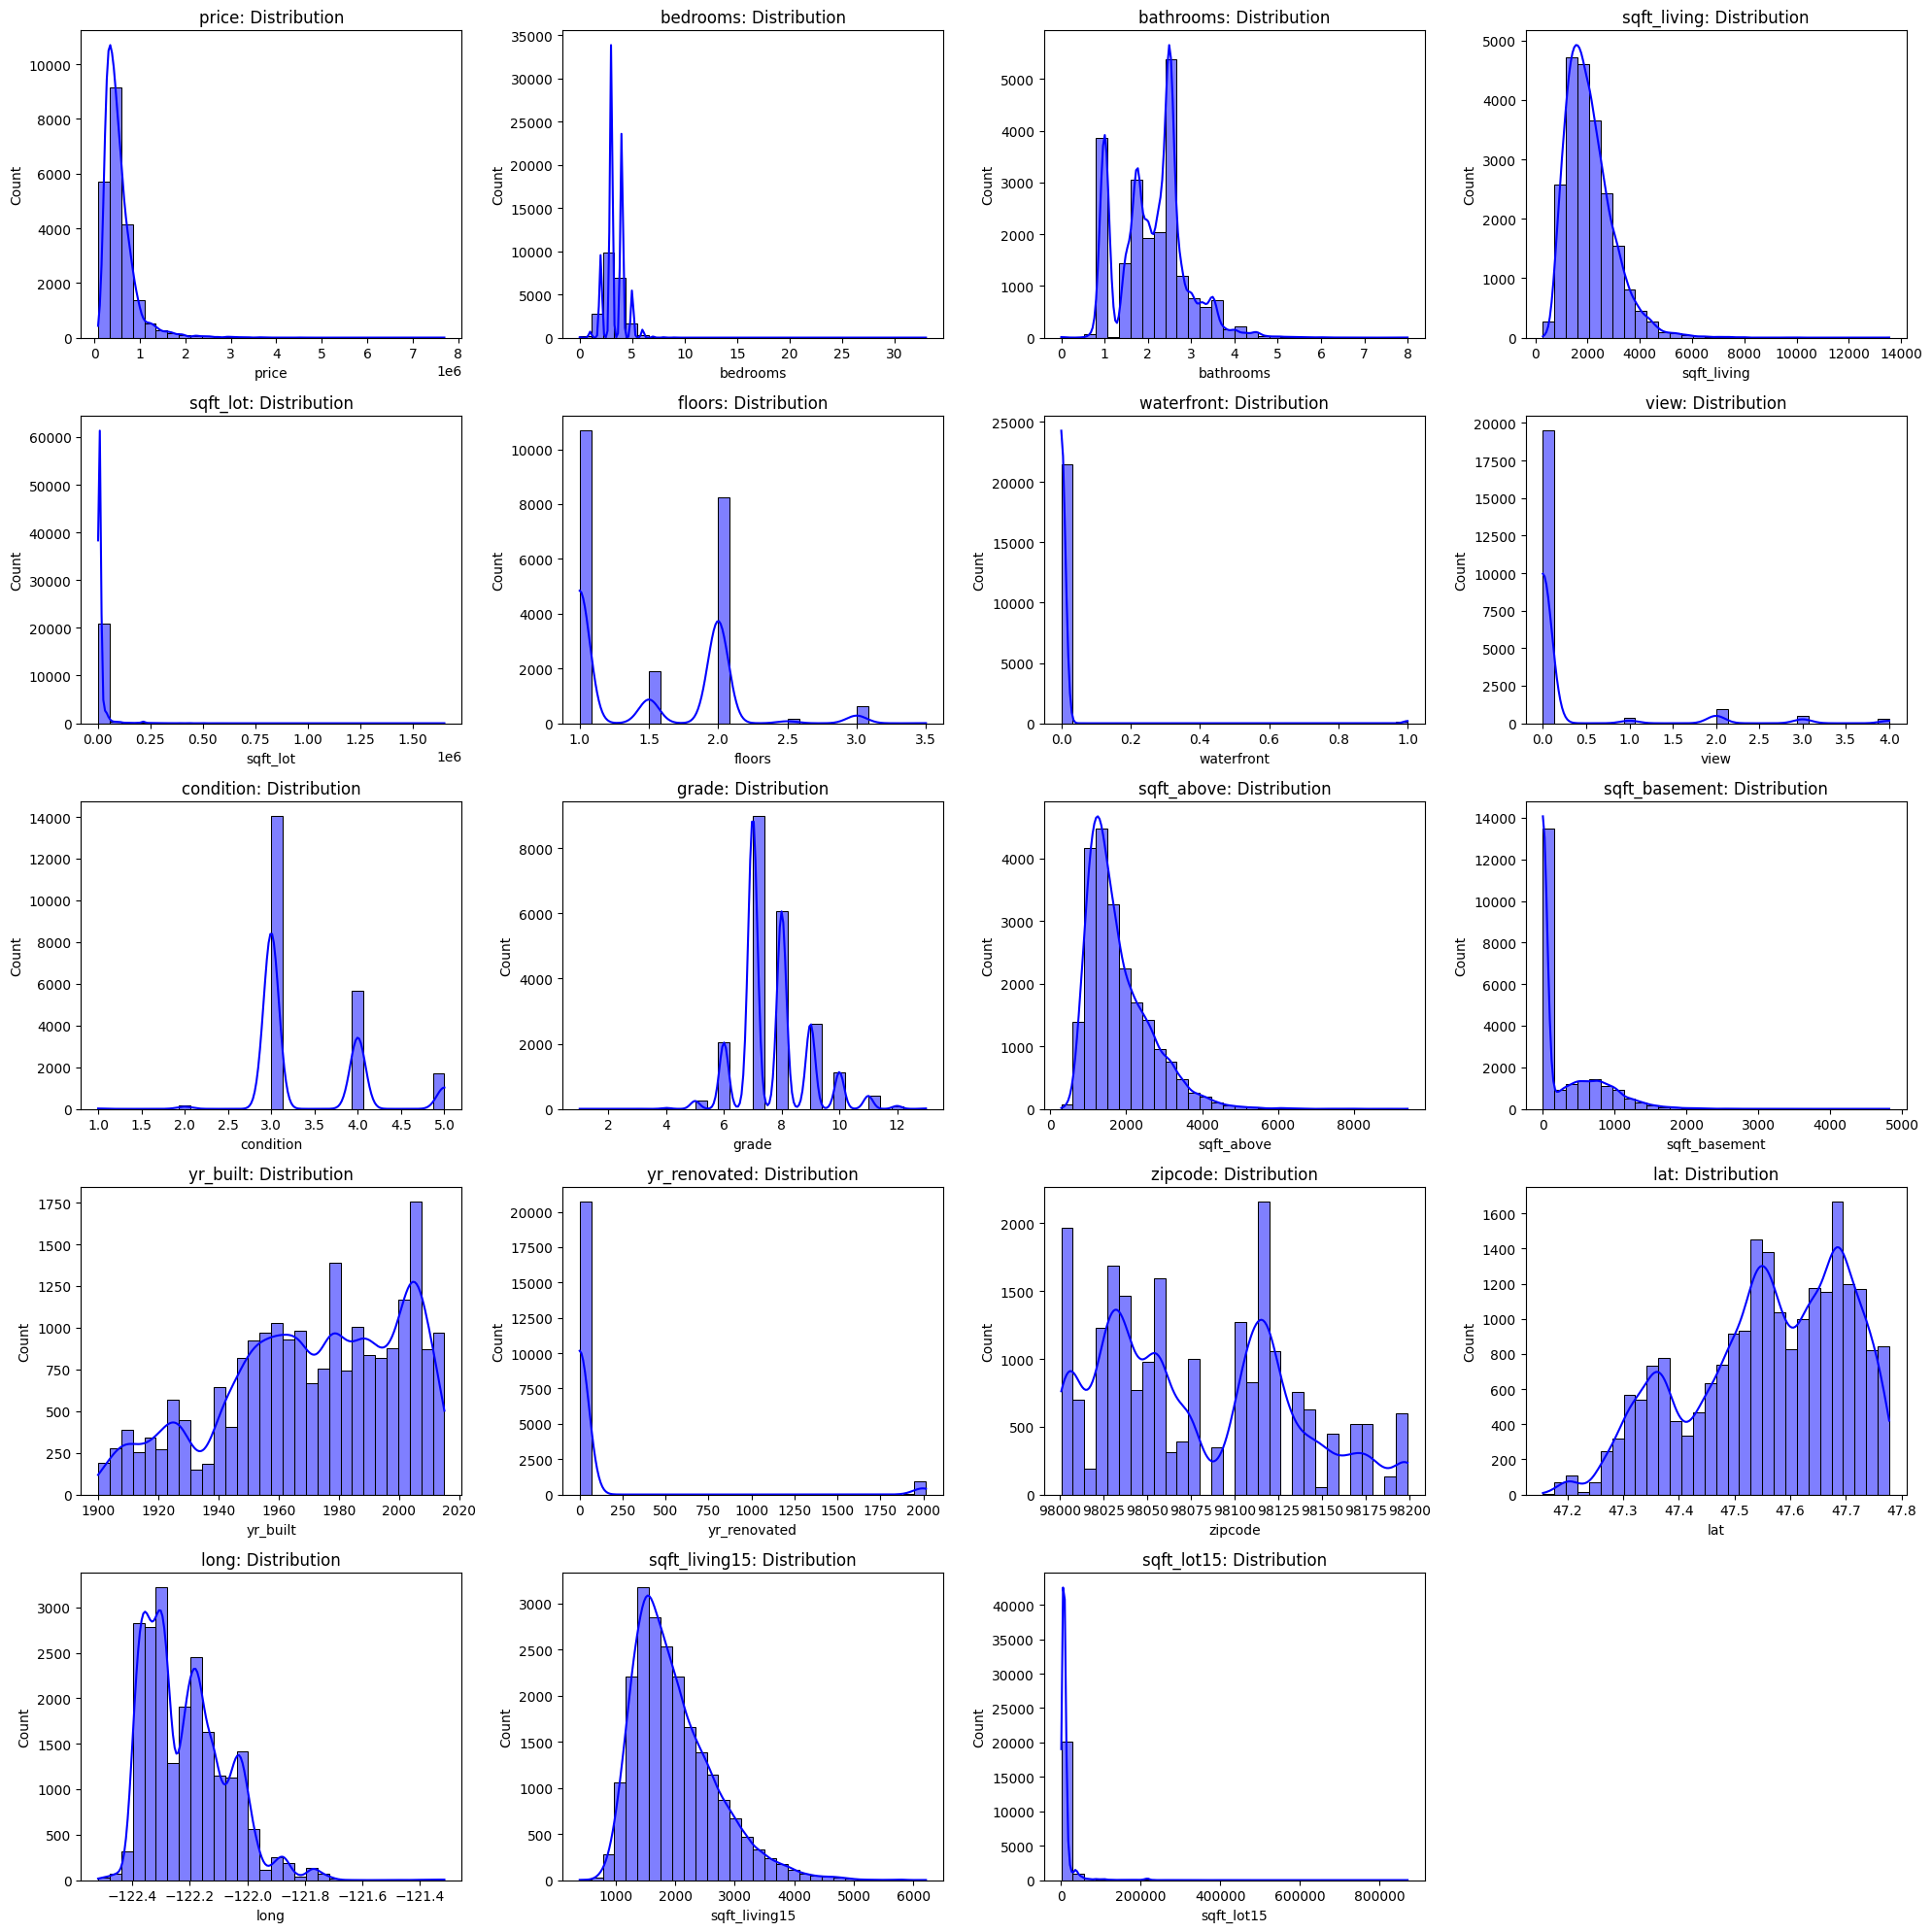

                Skewness  Normality p-value
Feature                                    
price           4.023790       3.493560e-66
bedrooms        1.974163       1.854917e-52
bathrooms       0.511072       3.968443e-42
sqft_living     1.471453       1.975415e-46
sqft_lot       13.059113       8.853178e-89
floors          0.616134       5.353447e-66
waterfront     11.384318       1.818063e-94
view            3.395514       2.402854e-86
condition       1.032733       3.985611e-70
grade           0.771050       3.588298e-50
sqft_above      1.446564       4.292865e-49
sqft_basement   1.577856       4.250020e-69
yr_built       -0.469773       4.541694e-37
yr_renovated    4.549178       3.038288e-90
zipcode         0.405633       2.742587e-40
lat            -0.485237       5.834702e-35
long            0.884992       1.015826e-42
sqft_living15   1.108104       2.330824e-42
sqft_lot15      9.506083       6.148194e-88


In [50]:
rapport = analyze_feature_distribution(df, features)
print(rapport)

Summary of Results

- Skewness (Asymmetry):

Measures how data is distributed:
0 = symmetric, positive = longer tail to the right, negative = longer tail to the left.

Key findings:
Variables like sqft_lot (13.05), waterfront (11.38), and sqft_lot15 (9.51) are highly skewed to the right, showing extreme values.
yr_built (-0.47) and lat (-0.48) have slight left-skewness.

- Normality Test (p-value):

Tests if data follows a normal (bell-shaped) distribution:
Very low p-values (< 0.05) indicate non-normal distributions.

Key findings:
All variables have extremely low p-values (e.g., price: 2.69e-71, waterfront: 2.08e-94), confirming no normal distributions.

- Conclusion:
The data shows significant skewness and no normality, likely due to outliers. This suggests the need for transformations (e.g., log scaling) or robust methods in further analysis.